# Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importación del dataset

In [2]:
df = pd.read_csv('../Data/data_raw.csv')

# Análisis exploratorio

## Análisis general

In [3]:
df.info() # Información general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
df.head() # Primer vistazo de los primeros 5 registros

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## Descripción de las variables

| **Variable**               | **Descripción**                                                                               |
| -------------------------- | --------------------------------------------------------------------------------------------- |
| **Month**                  | Mes en el que ocurrió el accidente.                                           |
| **WeekOfMonth**            | Semana del mes en el que ocurrió el accidente.                                           |
| **DayOfWeek**              | Día de la semana en el que ocurrió el accidente.                                         |
| **Make**                   | Fabricante del vehículo involucrado en el siniestro.                                          |
| **AccidentArea**           | Área donde ocurrió el accidente (urbana o rural).                                             |
| **DayOfWeekClaimed**       | Día de la semana en el que se procesó la reclamación.                                         |
| **MonthClaimed**           | Mes en el que se procesó la reclamación.                                                      |
| **WeekOfMonthClaimed**     | Semana del mes en la que se procesó la reclamación.                                           |
| **Sex**                    | Género del asegurado.                                                                         |
| **MaritalStatus**          | Estado civil del asegurado.                                                                   |
| **Age**                    | Edad del asegurado.                                                                           |
| **Fault**                  | Indica si el asegurado tuvo la culpa del accidente.                                           |
| **PolicyType**             | Tipo de póliza de seguro.                            |
| **VehicleCategory**        | Categoría del vehículo.                                                    |
| **VehiclePrice**           | Precio del vehículo.                                                                          |
| **FraudFound\_P**          | Variable objetivo: indica si se detectó fraude en la reclamación.                             |
| **PolicyNumber**           | Identificador único de la póliza de seguro.                                                   |
| **RepNumber**              | Identificador único del representante que gestionó la reclamación.                            |
| **Deductible**             | Deducible que debe pagar el asegurado antes de que la aseguradora cubra los costos restantes. |
| **DriverRating**           | Puntuación del conductor.                     |
| **Days\_Policy\_Accident** | Días desde la emisión de la póliza hasta el accidente.                                        |
| **Days\_Policy\_Claim**    | Días desde la emisión de la póliza hasta la reclamación.                                      |
| **PastNumberOfClaims**     | Número de reclamaciones anteriores del asegurado.                                             |
| **AgeOfVehicle**           | Antigüedad del vehículo.                                                                      |
| **AgeOfPolicyHolder**      | Edad del asegurado.                                                                     |
| **PoliceReportFiled**      | Indica si se presentó un informe policial.                                                    |
| **WitnessPresent**         | Indica si hubo testigos presentes en el accidente.                                            |
| **AgentType**              | Tipo de agente que gestionó la póliza (interno o externo).                                    |
| **NumberOfSuppliments**    | Número de documentos o reclamaciones suplementarias relacionadas con el caso.                 |
| **AddressChange\_Claim**   | Indica si el asegurado cambió de domicilio en el momento de la reclamación.                   |
| **NumberOfCars**           | Número de vehículos involucrados en el accidente.                                                |
| **Year**                   | Año en el que se realizó o procesó la reclamación.                                            |
| **BasePolicy**             | Tipo de póliza base.                    |


## Valores únicos

In [5]:
# Tabla para visualizar el número de valores únicos de cada variable y cada uno de esos valores

resumen_unicos = []

for col in df.columns:
    valores = df[col].value_counts(dropna=False).sort_index()
    resumen_unicos.append({
        "Variable": col,
        "Núm. Valores únicos": df[col].nunique(),
        "Valores": valores.to_dict()
    })

resumen_df = pd.DataFrame(resumen_unicos)
resumen_df

,Variable,Núm. Valores únicos,Valores
0,Month,12,"{'Apr': 1280, 'Aug': 1127, 'Dec': 1285, 'Feb':..."
1,WeekOfMonth,5,"{1: 3187, 2: 3558, 3: 3640, 4: 3398, 5: 1637}"
2,DayOfWeek,7,"{'Friday': 2445, 'Monday': 2616, 'Saturday': 1..."
3,Make,19,"{'Accura': 472, 'BMW': 15, 'Chevrolet': 1681, ..."
4,AccidentArea,2,"{'Rural': 1598, 'Urban': 13822}"
5,DayOfWeekClaimed,8,"{'0': 1, 'Friday': 2497, 'Monday': 3757, 'Satu..."
6,MonthClaimed,13,"{'0': 1, 'Apr': 1271, 'Aug': 1126, 'Dec': 1146..."
7,WeekOfMonthClaimed,5,"{1: 3450, 2: 3720, 3: 3583, 4: 3433, 5: 1234}"
8,Sex,2,"{'Female': 2420, 'Male': 13000}"
9,MaritalStatus,4,"{'Divorced': 76, 'Married': 10625, 'Single': 4..."


### Primeras observaciones

#### Variables categóricas simples
- **AccidentArea** → Convertir a variable booleana (`Urban`=1, `Rural`=0).  
- **Sex** → Convertir a booleana (`Male`=1, `Female`=0).  
- **Fault** → Convertir a booleana (`Third Party`=1, `Policy Holder`=0).  
- **PoliceReportFiled** → Convertir a booleana (`Yes`=1, `No`=0).  
- **WitnessPresent** → Convertir a booleana (`Yes`=1, `No`=0).  
- **AgentType** → Convertir a booleana (`Internal`=1, `External`=0).

#### Variables con valores erróneos
- **DayOfWeekClaimed** → 8 valores únicos; el valor `0` es erróneo → eliminar (solo 1 caso).  
- **MonthClaimed** → 13 valores únicos; el valor `0` es erróneo → eliminar (solo 1 caso).  
- **Age** → Contiene `0` (no válido como edad) → imputar (hay bastantes casos).

#### Variables redundantes o poco informativas
- **PolicyType** → Parece la combinación de **VehicleCategory** y **BasePolicy**. A analizar su redundancia.
- **Age** y **AgeOfPolicyHolder** → Parecen la misma variable. Como **Age** tiene muchos valores 0, se opta por eliminar esta variable y mantener la segunda.
- **PolicyNumber** → Identificador único, sin valor predictivo.
- **RepNumber** → Identificador único, sin valor predictivo.
- **Year** → Variable temporal que no puede usarse en un entorno real porque no generaliza a años futuro.


#### Variables con valores en rangos que requieren conversión
Para estas variables categóricas con intervalos de valores, reemplazar cada rango por el valor medio y convertir a **float**:
- **VehiclePrice**
- **Days_Policy_Accident**
- **Days_Policy_Claim**
- **AgeOfVehicle**
- **NumberOfCars**
- **PastNumberOfClaims**
- **AgeOfPolicyHolder**
- **NumberOfSuppliments**
- **AddressChange_Claim**


#### Variables que no tienen clarificación
- **DriverRating** → ¿En qué se basa esa puntuación? Eliminar por falta de información.

#### Variables categóricas a codificar
A continuación, se identifican las variables categóricas que necesitan ser transformadas antes de ser utilizadas en el modelo:
- **Month**
- **DayOfWeek**
- **Make**
- **DayOfWeekClaimed**
- **MonthClaimed**
- **MaritalStatus**
- **VehicleCategory**
- **BasePolicy**
- **AddressChange_Claim**

#### Problemas de desbalance
- **FraudFound_P** → Variable objetivo muy desbalanceada (~6% casos positivos). Se valora aplicar SMOTE en el modelo.

## Valores atípicos

In [6]:
# Para variables numéricas:
## Cálculo del coeficiente de asimetría (skewness)

df.select_dtypes(include=np.number).skew()

WeekOfMonth           0.115426
WeekOfMonthClaimed    0.158233
Age                   0.152314
FraudFound_P          3.711164
PolicyNumber          0.000000
RepNumber             0.006628
Deductible            6.078803
DriverRating          0.009283
Year                  0.245689
dtype: float64

In [7]:
# Para variables numéricas:
## Extracción de estadísticas clave: media, desviación estándar (std), mínimo, máximo, y los percentiles 25%, 50% y 75%

df.describe(include=np.number)

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [8]:
# Para variables categóricas:
## Extracción de estadísticas clave: top y frecuencia

df.describe(exclude=np.number)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


### Observaciones sobre las variables numéricas

1. **Age**  
   - Mínimo = 0 → valor inválido.  
   - Máximo = 80 → razonable.  
   - Media ≈ 39.86 → predominan adultos de mediana edad.

2. **FraudFound_P**  
   - Media ≈ 0.059 → confirma fuerte desbalance (~6% casos positivos).  

3. **PolicyNumber**  
   - Rango 0–15420 → identificador único sin valor predictivo. Se eliminará.

4. **RepNumber**  
   - Rango 1–16 → código interno del representante. Se eliminará.

5. **Deductible**  
   - Valores entre 300 y 700 esperados, pero predominio claro en 400.  

6. **DriverRating**  
   - Rango 1–4 → variable ordinal. Se eliminará.

7. **Year**  
   - Rango 1994–1996 → dataset solo cubre 3 años.  

8. **WeekOfMonth** / **WeekOfMonthClaimed**  
   - Rango 1–5.  
   - Medias ~2.7 

## Valores faltantes

In [9]:
# Recuento de valores NaN explícitos

df.isnull().sum() 

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Se confirma que no existen valores *missing*.

## Análisis de colinealidad y correlación

### Análisis variables numéricas

In [10]:
# Mapa de calor de correlaciones (heatmap) con degradado de color para identificar visualmente relaciones destacadas entre pares de variables

corr = df.select_dtypes(include=np.number).corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000,0.275,-0.005,-0.012,-0.008,0.005,-0.004,-0.017,-0.004
WeekOfMonthClaimed,0.275,1.000,0.002,-0.006,0.012,0.009,0.005,-0.000,0.012
Age,-0.005,0.002,1.000,-0.030,0.026,-0.007,0.069,0.002,0.025
FraudFound_P,-0.012,-0.006,-0.030,1.000,-0.020,-0.008,0.017,0.007,-0.025
PolicyNumber,-0.008,0.012,0.026,-0.020,1.000,0.009,0.002,-0.012,0.937
RepNumber,0.005,0.009,-0.007,-0.008,0.009,1.000,0.001,0.011,0.009
Deductible,-0.004,0.005,0.069,0.017,0.002,0.001,1.000,0.004,-0.001
DriverRating,-0.017,-0.000,0.002,0.007,-0.012,0.011,0.004,1.000,-0.014
Year,-0.004,0.012,0.025,-0.025,0.937,0.009,-0.001,-0.014,1.000


In [11]:
# Clasificación de correlaciones absolutas respecto a la variable objetivo, ordenadas de mayor a menor.

corr = abs(df.select_dtypes(include=np.number).corr())
corr[['FraudFound_P']].sort_values(by = 'FraudFound_P',ascending = False)

,FraudFound_P
FraudFound_P,1.000000
Age,0.029741
Year,0.024760
PolicyNumber,0.020345
Deductible,0.017348
WeekOfMonth,0.011861
RepNumber,0.007551
DriverRating,0.007266
WeekOfMonthClaimed,0.005761


#### Observaciones

**Magnitudes muy bajas**
   - Ninguna variable numérica presenta correlación > 0.03 con **FraudFound_P**.
   - Esto confirma que no hay una variable numérica aislada que sea un predictor fuerte de fraude.
   - El poder predictivo probablemente esté en combinaciones de variables y patrones no lineales.

**Otras observaciones**:
- El modelo deberá explotar interacciones y relaciones no lineales, lo que sugiere que algoritmos como árboles de decisión (XGBoost o LightGBM) pueden ser más adecuados que modelos lineales simples.

### Análisis variables categóricas

In [12]:
# Función V de Cramér
def cramers_v(x, y):
    tab = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(tab)[0]
    n = tab.values.sum()
    phi2 = chi2 / n
    r, k = tab.shape
    # Corrección por sesgo
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    return np.sqrt(phi2corr / denom) if denom > 0 else np.nan

# Selección de categóricas
MAX_CARDINALITY = 50  
cat_cols = [
    c for c in df.columns
    if (
        (df[c].dtype == 'object' or str(df[c].dtype) == 'category')
        or (pd.api.types.is_integer_dtype(df[c]) and df[c].nunique() <= 15)
    )
]

# Ajustes varios
target = 'FraudFound_P'
cat_cols = [c for c in cat_cols if c != target]

to_exclude = {'PolicyNumber', 'RepNumber', 'Year', 'DriverRating'}
cat_cols = [c for c in cat_cols if c not in to_exclude]

y = df[target].astype(str)

# Cálculo en bloque 
rows = []
for c in cat_cols:
    x = df[c].astype(str)  # tratar NaN como 'nan'
    # (opcional) saltar columnas con cardinalidad desmesurada
    if x.nunique(dropna=False) > MAX_CARDINALITY:
        rows.append({"variable": c, "cardinalidad": x.nunique(), "v_cramer": np.nan})
        continue
    v = cramers_v(x, y)
    rows.append({"variable": c, "cardinalidad": x.nunique(), "v_cramer": v})

cramer_df = (
    pd.DataFrame(rows)
    .sort_values("v_cramer", ascending=False)
    .reset_index(drop=True)
)

cramer_df

,variable,cardinalidad,v_cramer
0,PolicyType,9,0.166880
1,BasePolicy,3,0.161237
2,VehicleCategory,3,0.136892
3,Fault,2,0.130839
4,AddressChange_Claim,5,0.080827
5,Deductible,4,0.067096
6,VehiclePrice,6,0.063803
7,PastNumberOfClaims,4,0.057230
8,Make,19,0.052072
9,MonthClaimed,13,0.044305


In [13]:
# Matriz vacía
redundancy_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# Cálculo
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            redundancy_matrix.loc[col1, col2] = 1.0
        else:
            redundancy_matrix.loc[col1, col2] = cramers_v(
                df[col1].astype(str),
                df[col2].astype(str)
            )
            
redundancy_matrix

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
Month,1.000000,0.041288,0.038230,0.000000,0.011199,0.033688,0.747048,0.055586,0.016662,0.000000,...,0.017109,0.042221,0.031756,0.048222,0.000000,0.018577,0.015619,0.007780,0.059911,0.027061
WeekOfMonth,0.041288,1.000000,0.015834,0.005024,0.008196,0.009069,0.034555,0.401083,0.000000,0.010735,...,0.004506,0.000000,0.010117,0.002525,0.000000,0.000000,0.000000,0.000000,0.000000,0.006613
DayOfWeek,0.038230,0.015834,1.000000,0.000000,0.024085,0.143995,0.011495,0.000000,0.019061,0.016736,...,0.015877,0.013079,0.021922,0.012841,0.000000,0.000000,0.005012,0.000000,0.000000,0.043162
Make,0.000000,0.005024,0.000000,1.000000,0.046078,0.000000,0.000000,0.000000,0.073264,0.067654,...,0.033761,0.136873,0.120186,0.009755,0.000000,0.033383,0.050781,0.000000,0.027050,0.114251
AccidentArea,0.011199,0.008196,0.024085,0.046078,1.000000,0.025763,0.028732,0.008328,0.032531,0.000000,...,0.061275,0.017491,0.019578,0.000000,0.025711,0.000000,0.014681,0.025268,0.006159,0.055858
DayOfWeekClaimed,0.033688,0.009069,0.143995,0.000000,0.025763,1.000000,0.379825,0.034784,0.000000,0.001638,...,0.003849,0.019671,0.023098,0.010614,0.009409,0.022069,0.000000,0.000000,0.003409,0.015649
MonthClaimed,0.747048,0.034555,0.011495,0.000000,0.028732,0.379825,1.000000,0.062432,0.013365,0.000000,...,0.021527,0.050035,0.044539,0.058189,0.000000,0.026430,0.015780,0.000000,0.041025,0.032798
WeekOfMonthClaimed,0.055586,0.401083,0.000000,0.000000,0.008328,0.034784,0.062432,1.000000,0.000000,0.005955,...,0.015204,0.000000,0.000000,0.023282,0.000000,0.006986,0.009305,0.006687,0.000000,0.013382
Sex,0.016662,0.000000,0.019061,0.073264,0.032531,0.000000,0.013365,0.000000,1.000000,0.155753,...,0.000000,0.212081,0.135169,0.000000,0.000000,0.008846,0.008177,0.000000,0.000000,0.068938
MaritalStatus,0.000000,0.010735,0.016736,0.067654,0.000000,0.001638,0.000000,0.005955,0.155753,1.000000,...,0.013760,0.265808,0.304052,0.000000,0.012698,0.012194,0.020860,0.000000,0.012541,0.036605


#### Observaciones

**Correlación con la variable objetivo**
- Las variables categóricas muestran correlaciones más altas con el fraude.

**Redundancia entre categóricas relevantes**
- **PolicyType** ↔ **BasePolicy** → V ≈ 0.9998 → redundancia casi perfecta.
- **PolicyType** ↔ **VehicleCategory** → V ≈ 0.9998 → redundancia casi perfecta.
- Eliminar **PolicyType** para evitar colinealidad extrema.

## Descomposición de la variable objetivo por subgrupos predictivos

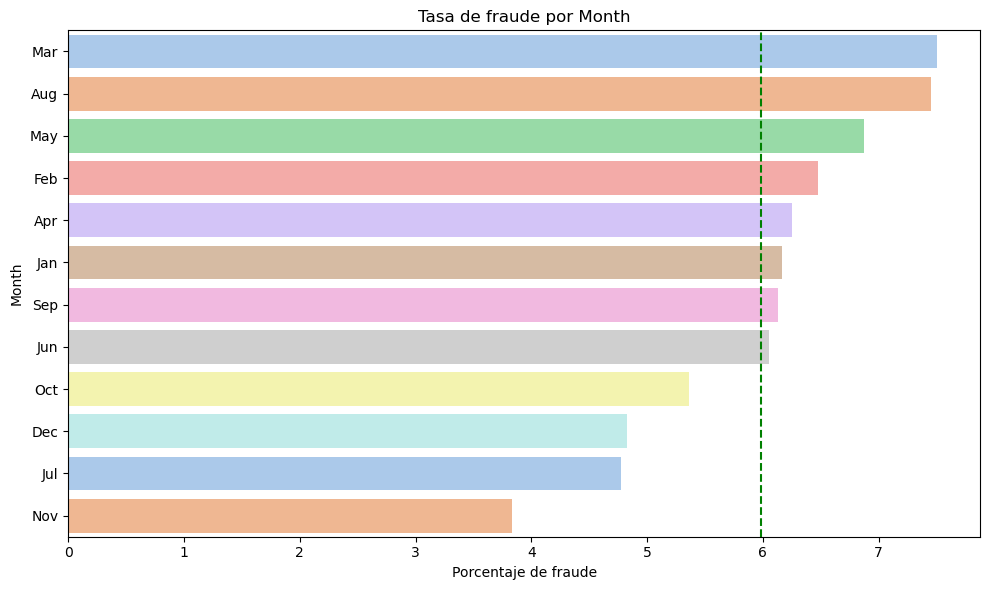

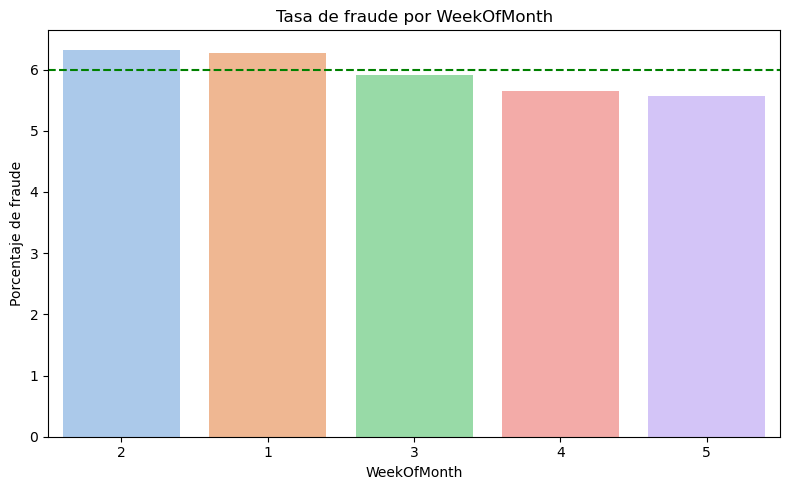

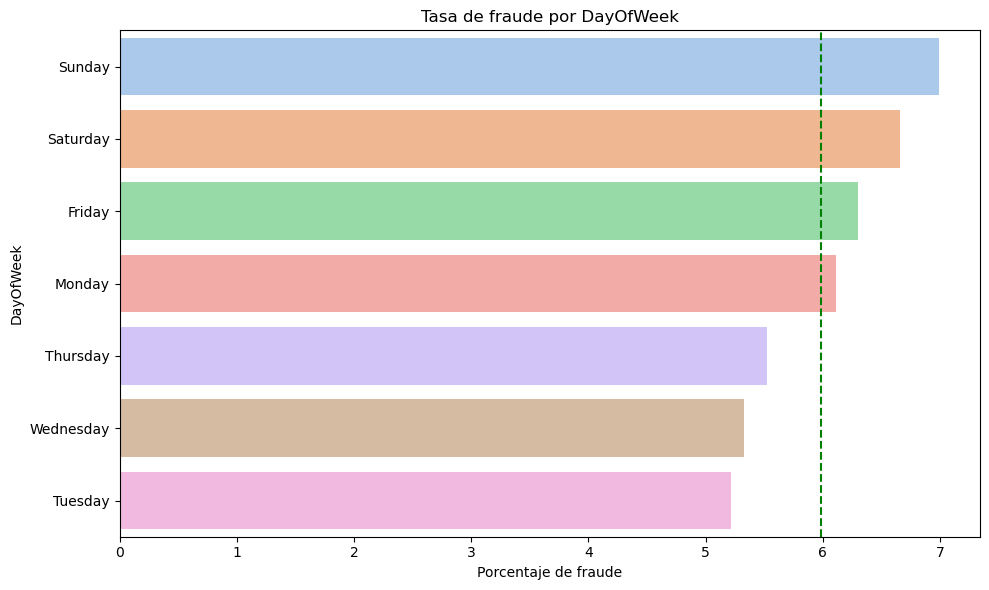

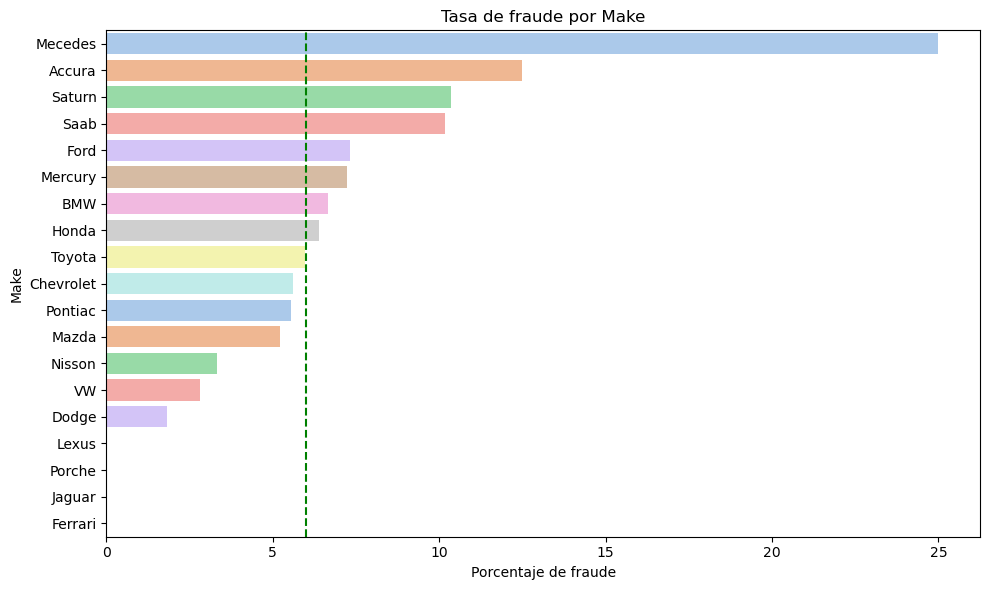

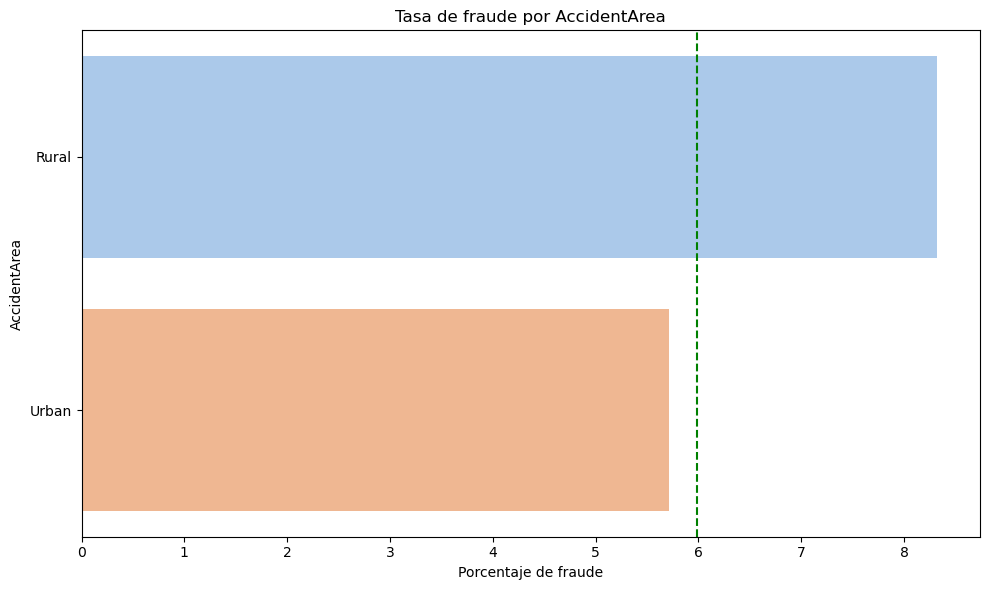

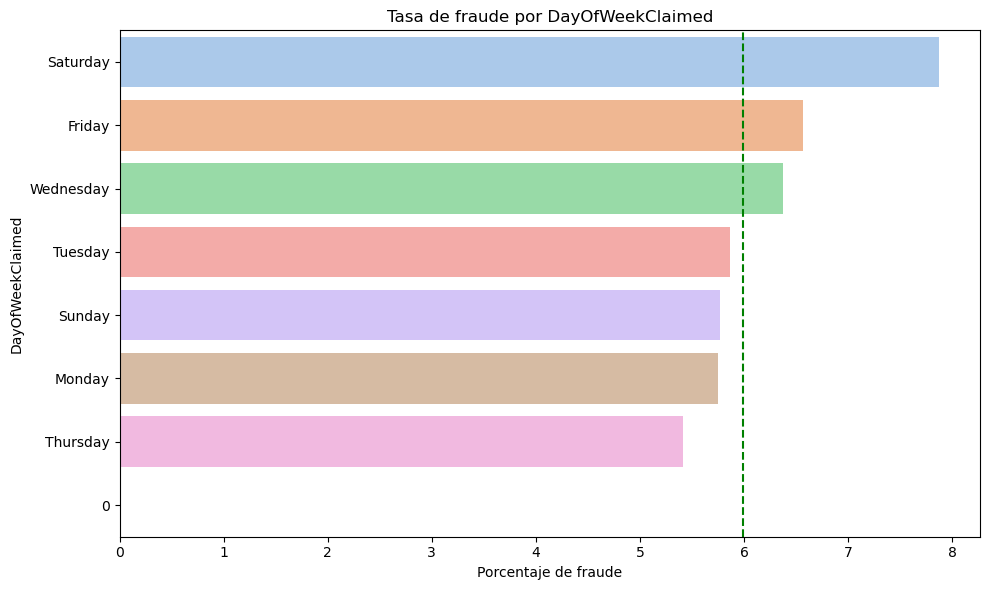

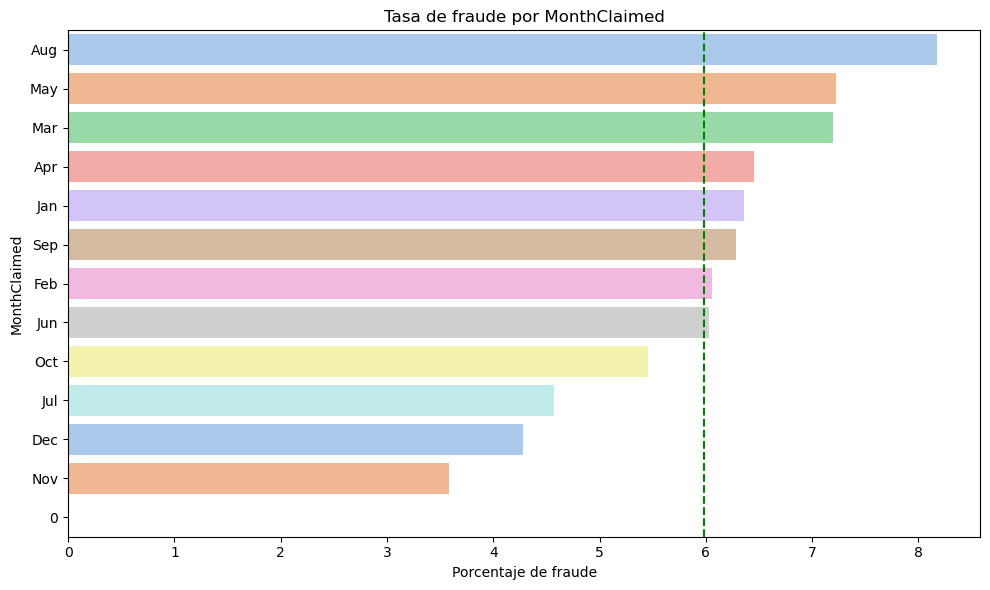

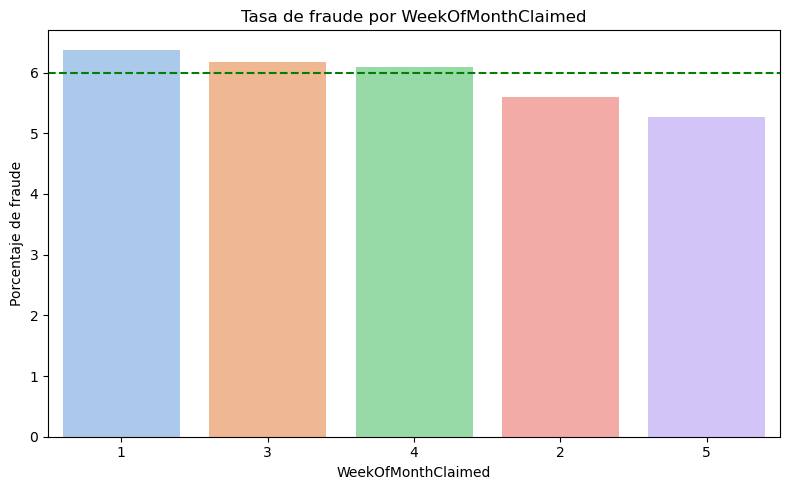

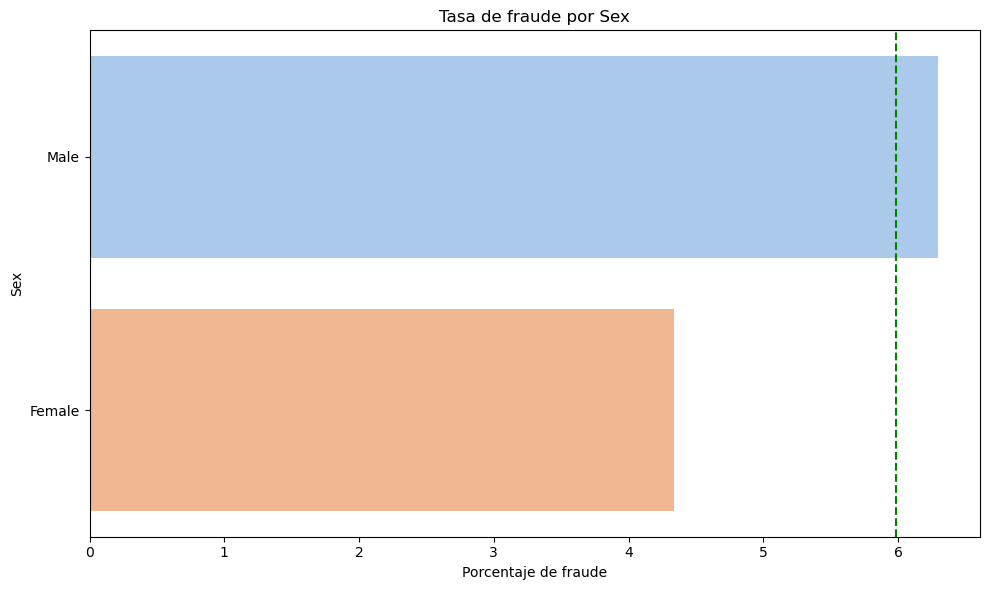

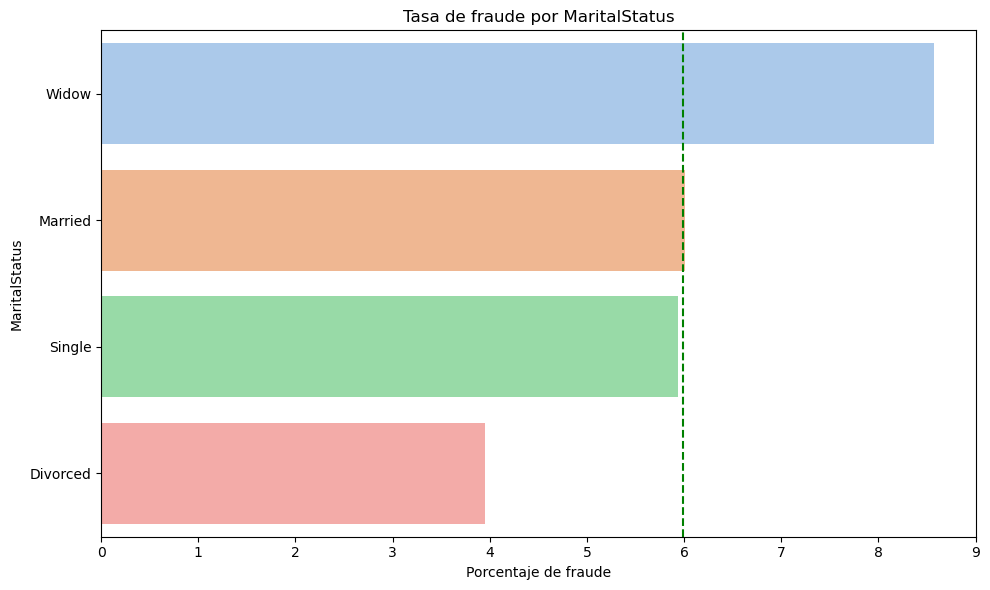

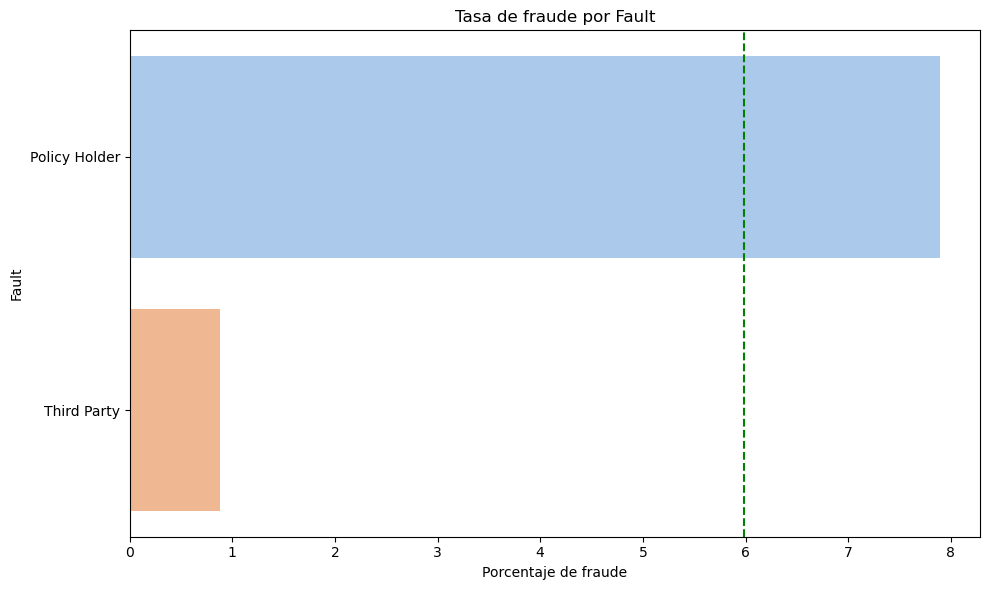

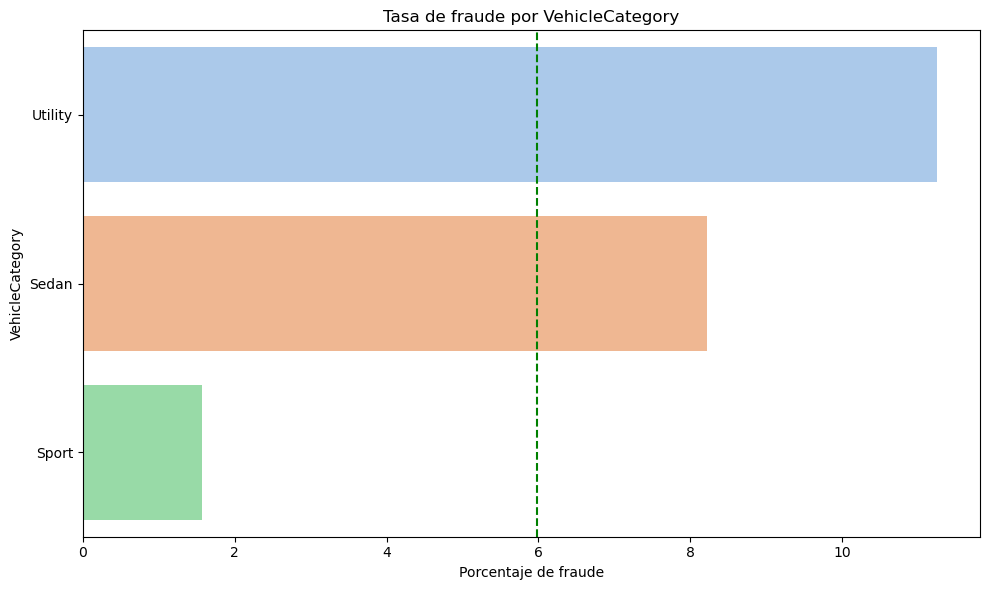

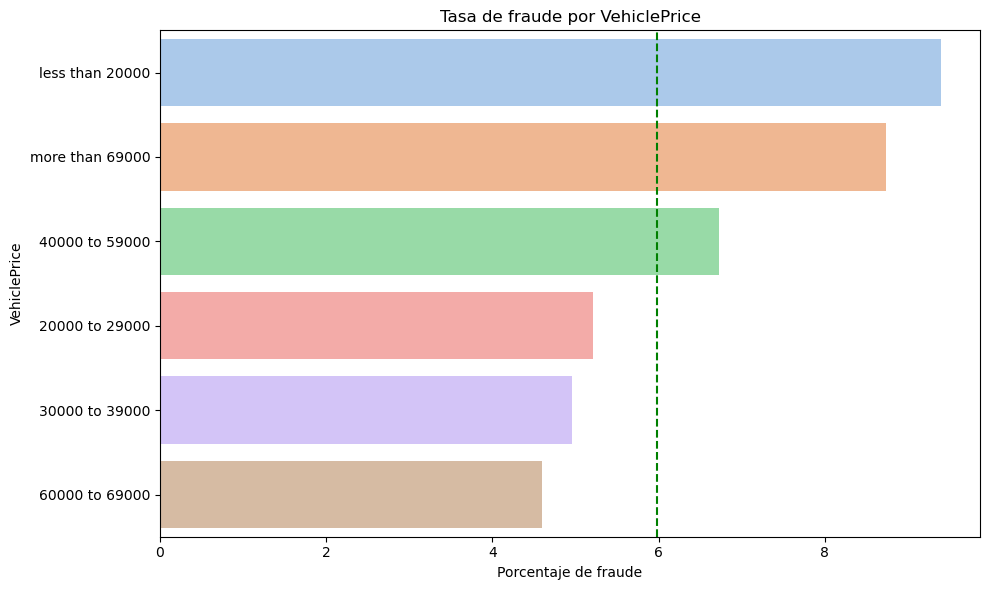

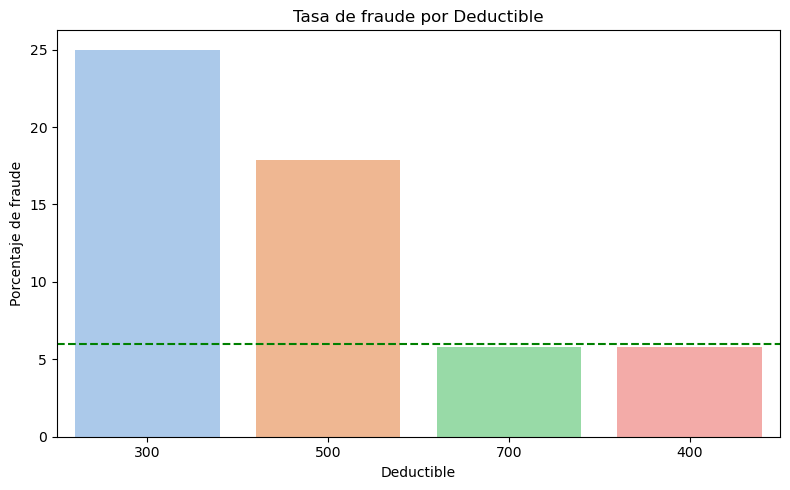

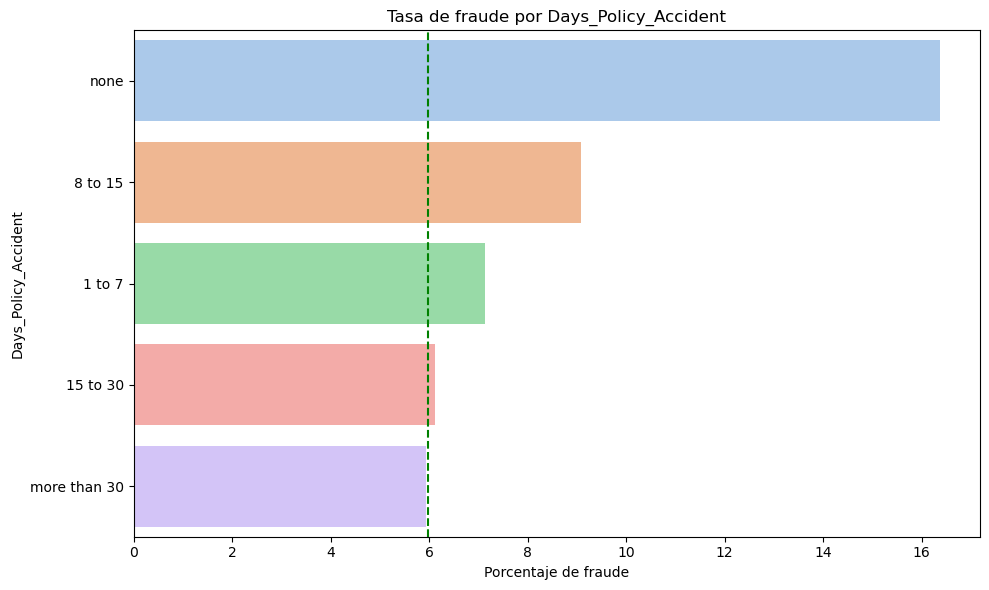

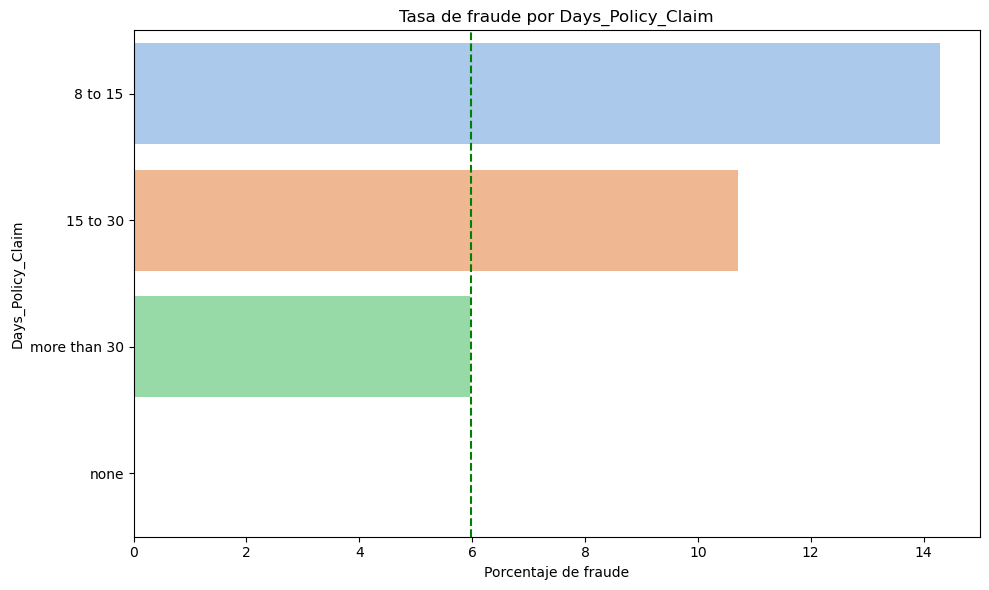

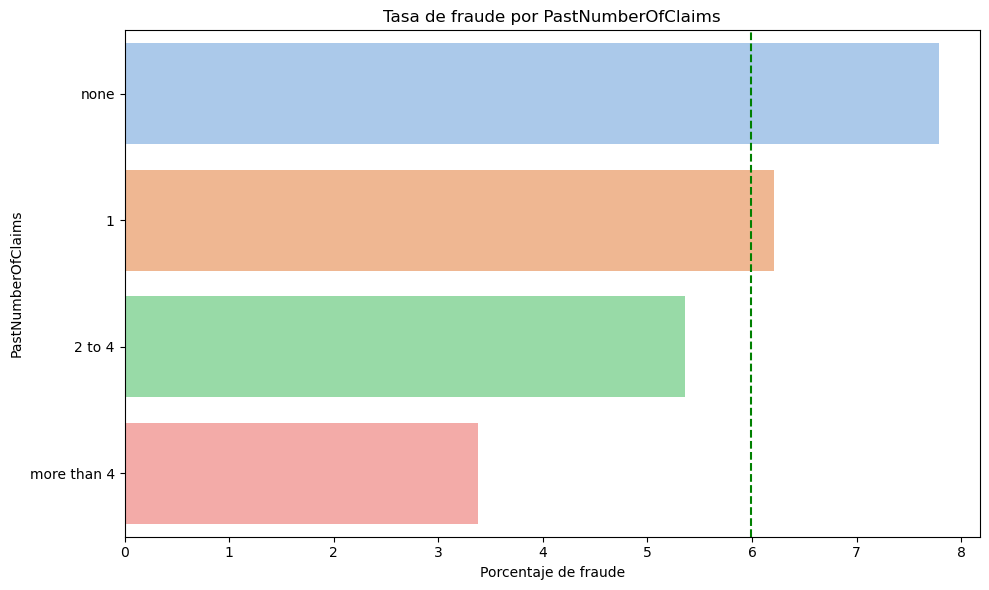

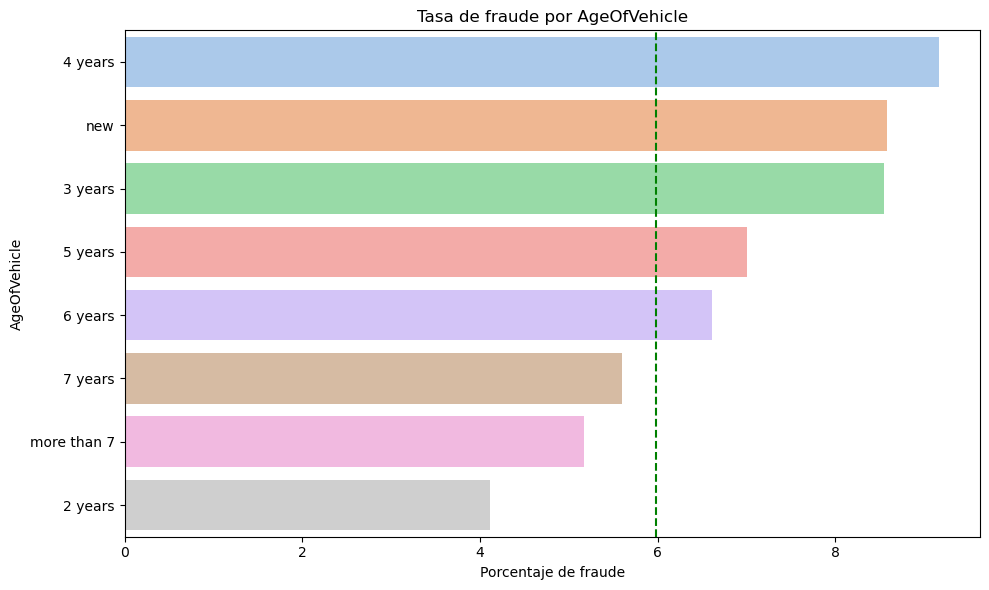

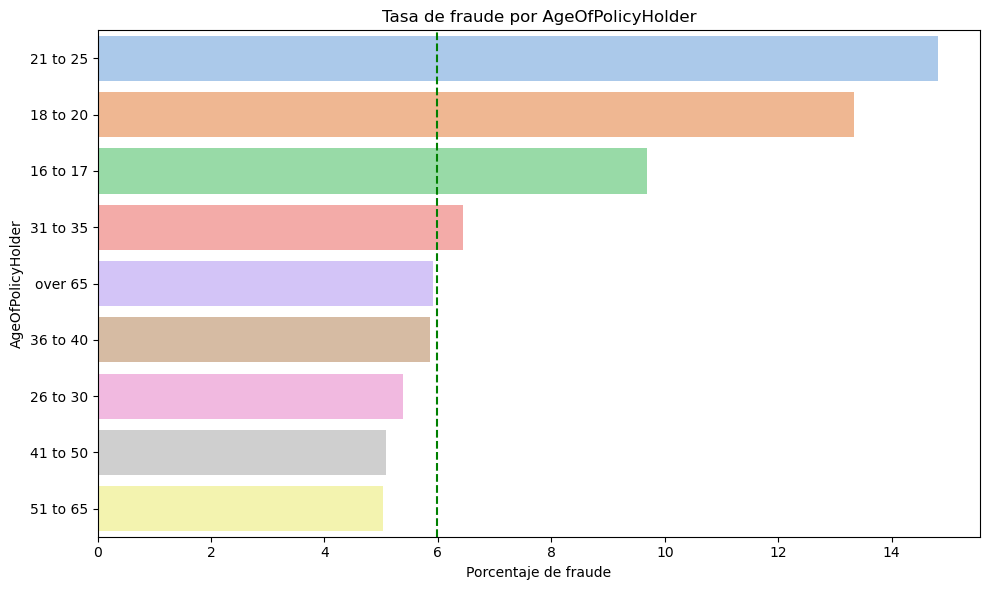

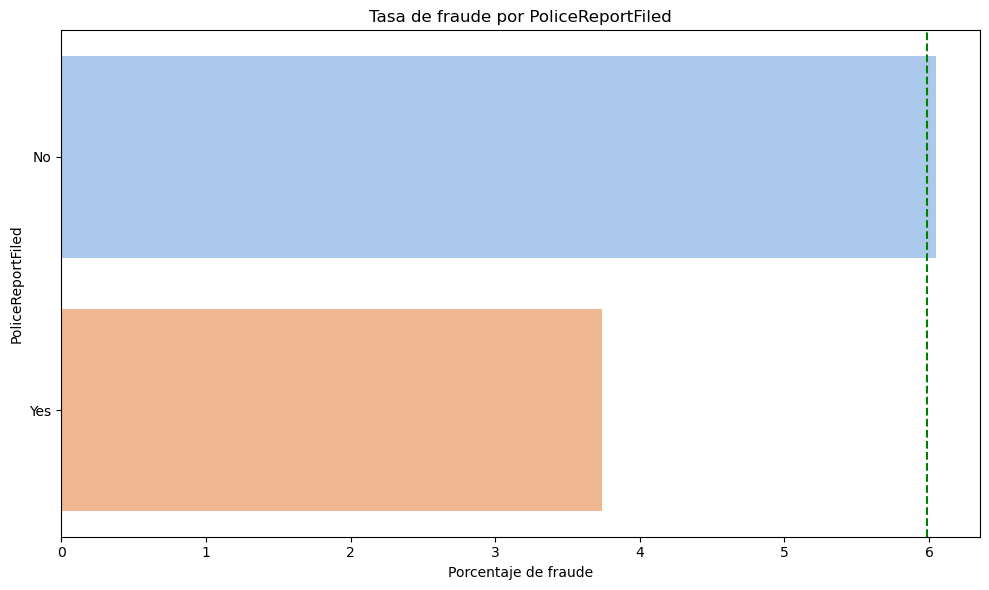

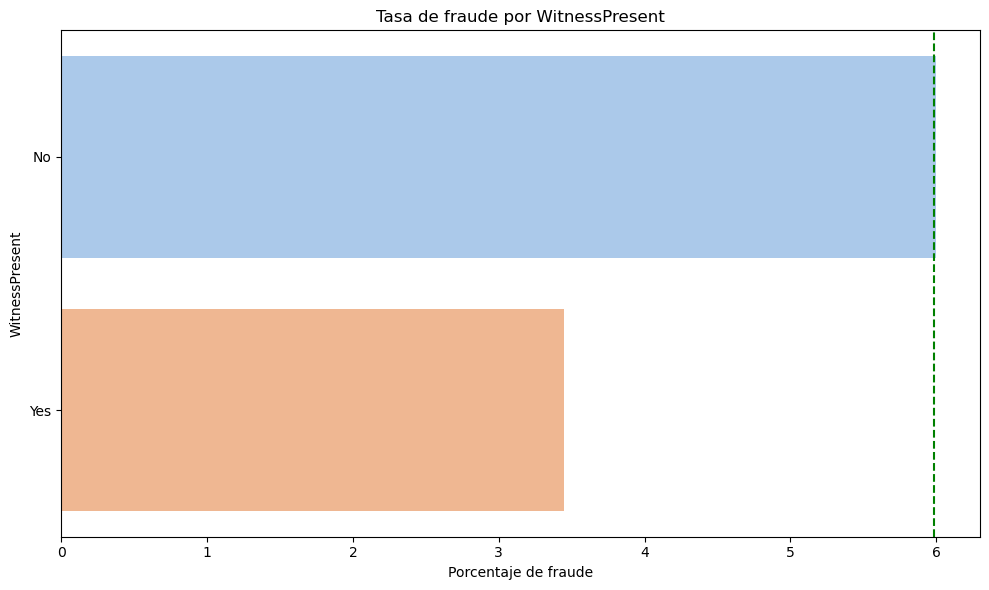

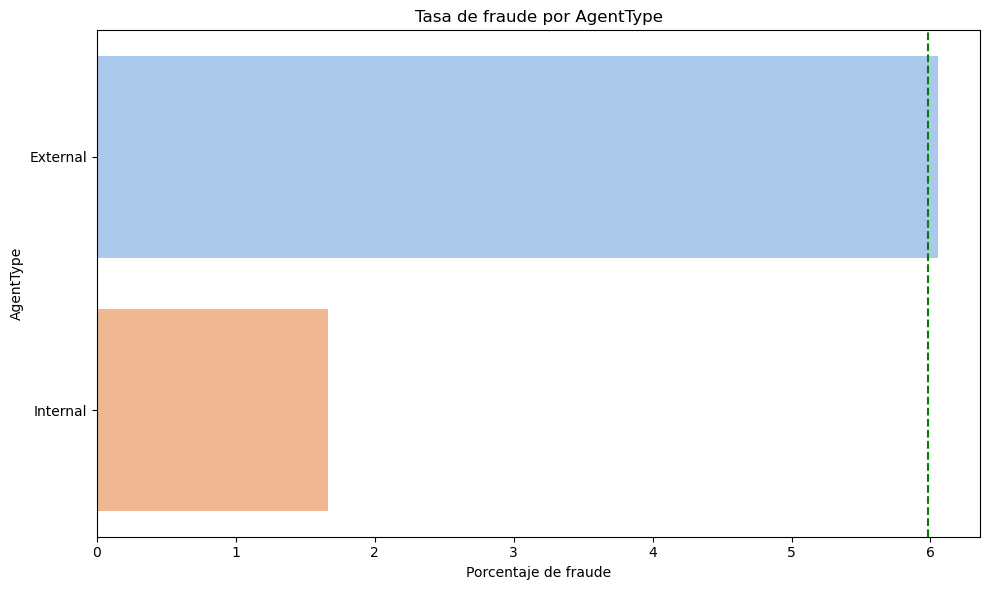

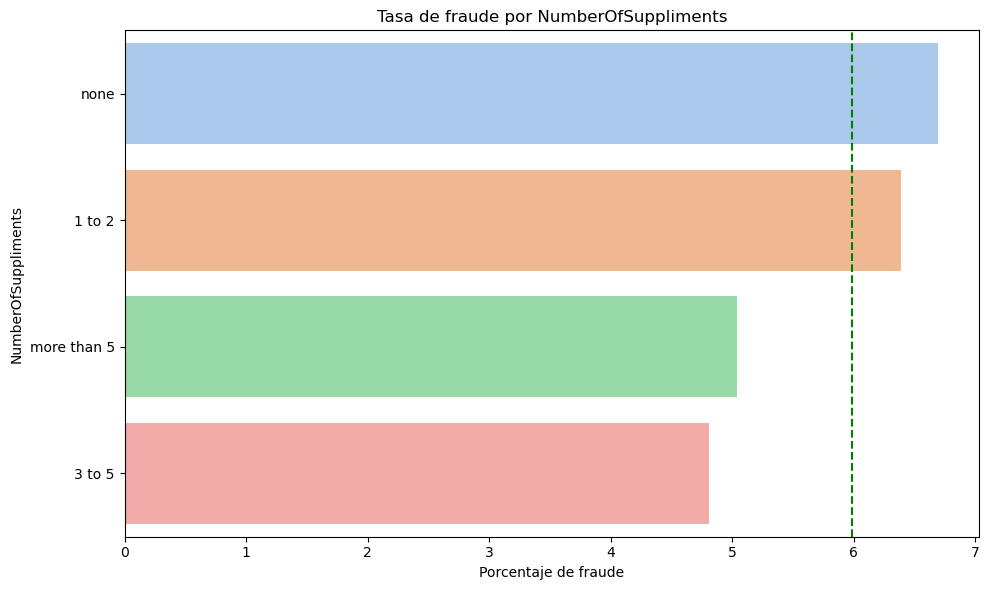

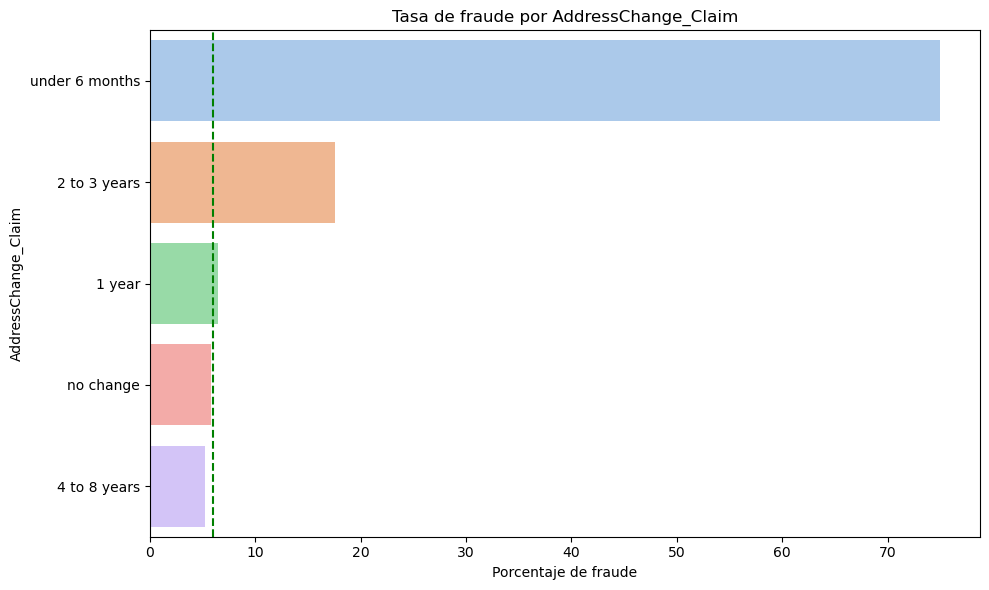

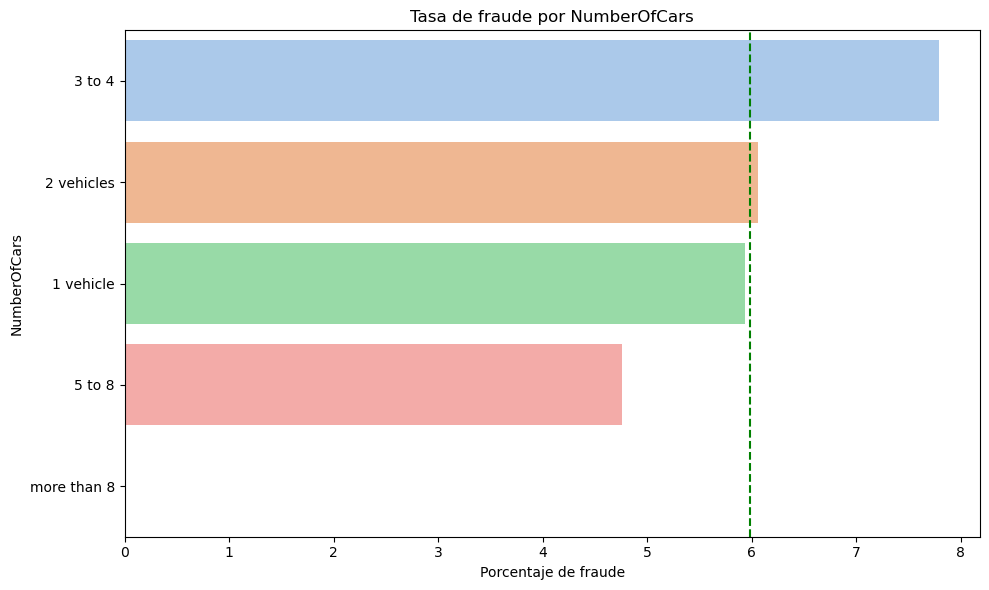

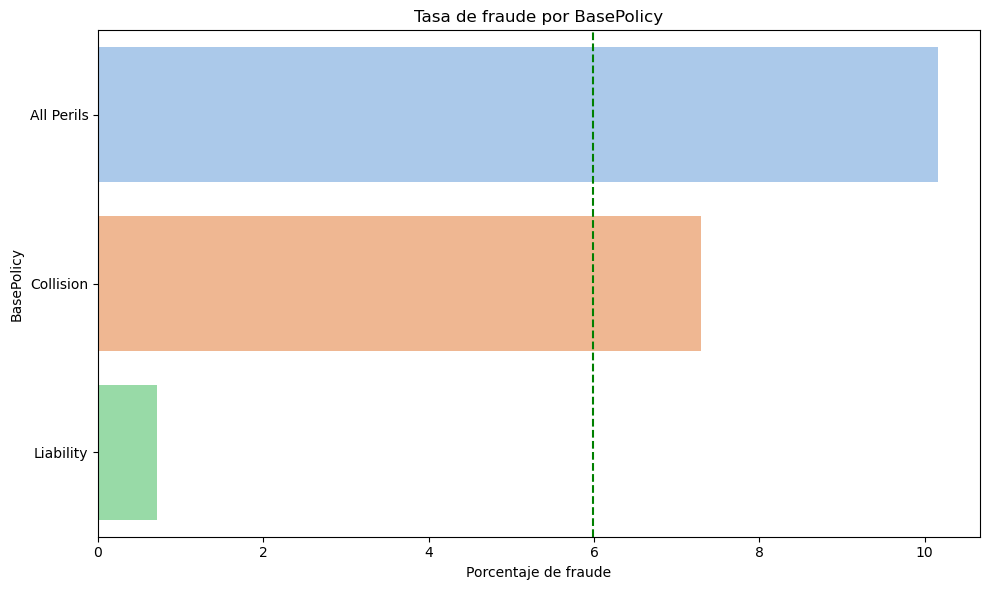

In [14]:
# Variables a excluir porque se van a eliminar
excluded_cols = ['FraudFound_P', 'PolicyNumber', 'RepNumber', 'PolicyType', 'Age', 'DriverRating', 'Year']
# Variable objetivo
target_col = 'FraudFound_P'

features = [col for col in df.columns if col not in excluded_cols and not col.endswith('_binned')]

# Función personalizada que calcula, para cada categoría o intervalo, la tasa de fraude como el porcentaje de registros etiquetados como fraudulentos
def plot_fraud_rate(df, column, target='FraudFound_P', horizontal=False):
    data = df.groupby(column)[target].agg(['count', 'sum']).reset_index()
    data['percentage'] = 100 * data['sum'] / data['count']
    data = data.sort_values('percentage', ascending=False)
    data[column] = data[column].astype(str)

    unique_vals = data[column].nunique()
    palette = sns.color_palette("pastel", n_colors=unique_vals)
    figsize = (10, 6) if horizontal else (8, 5)
    plt.figure(figsize=figsize)
    if horizontal:
        sns.barplot(y=column, x='percentage', data=data, palette=palette)
        plt.axvline(df[target].mean() * 100, color='green', linestyle='--')
        plt.xlabel('Porcentaje de fraude')
        plt.ylabel(column)
    else:
        sns.barplot(x=column, y='percentage', data=data, palette=palette)
        plt.axhline(df[target].mean() * 100, color='green', linestyle='--')
        plt.ylabel('Porcentaje de fraude')
        plt.xlabel(column)

    plt.title(f'Tasa de fraude por {column}', loc='center')
    plt.tight_layout()
    plt.show()

# Para variables numéricas con alta cardinalidad,proceso de discretización por cuantiles (qcut) en cinco intervalos para facilitar su interpretación y comparación.
for col in features:
    if df[col].nunique() <= 1:
        continue
    if pd.api.types.is_numeric_dtype(df[col]):
        if df[col].nunique() > 20:
            binned_col = f'{col}_binned'
            df[binned_col] = pd.qcut(df[col], q=5, duplicates='drop')
            plot_fraud_rate(df, binned_col, target=target_col, horizontal=True)
        else:
            plot_fraud_rate(df, col, target=target_col, horizontal=False)
    else:
        plot_fraud_rate(df, col, target=target_col, horizontal=True)

### 